## **EDA After Data Processing**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer
from textblob import TextBlob
import numpy as np

In [2]:
sns.set(style="whitegrid")

In [3]:
reviews = pd.read_json('../../data/processed/IMDB_reviews_train_cleaned.json')
data = reviews.rename(columns = {'rating_x': 'user_rating', 'rating_y': 'movie_rating'})

data

,review_date,movie_id,user_id,is_spoiler,review_text,user_rating,review_summary,plot_summary,duration,genre,...,release_date,plot_synopsis,review_year,review_month,review_day,release_year,release_month,release_day,polarity,subjectivity
407943,1156377600000,tt0463985,ur10173727,False,i saw the i not impressed not a but the car ar...,5,not such a good movie,An American teenager named Sean Boswell is a l...,104,"[Action, Crime, Thriller]",...,1150416000000,"In rural Arizona, a young, 17-year-old, rednec...",2006,8,24,2006,6,16,0.446429,0.619444
171849,1430870400000,tt0790724,ur0453068,False,jack reacher solid action set piece when they ...,6,"good stuff, except...","In an innocent heartland city, five are shot d...",130,"[Action, Crime, Mystery]",...,1356048000000,"In Pittsburgh, Pennsylvania, a man drives a va...",2015,5,6,2012,12,21,0.195402,0.588697
557247,1132876800000,tt0160862,ur7395261,True,i saw not another teen watching although did n...,10,A good movie to pass the time,She's All That is your typical high school pro...,95,"[Comedy, Romance]",...,917568000000,None,2005,11,25,1999,1,29,0.106347,0.621815
374693,1147737600000,tt0388795,ur8323774,False,absolutely the best film should have done at t...,10,Heart Wrenching,"Two young men, Ennis Del Mar and Jack Twist, m...",134,"[Drama, Romance]",...,1137110400000,"In the summer of 1963, two young men meet when...",2006,5,16,2006,1,13,0.340985,0.621667
546384,1324771200000,tt0120812,ur24340247,True,rush hour starting jackie chan chris tucker th...,10,The Best Action Comedy Movie Ever,Cultures clash and tempers flares as the two c...,98,"[Action, Comedy, Crime]",...,906076800000,When kidnappers grab a Chinese official's daug...,2011,12,25,1998,9,18,0.265476,0.472619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312187,1036195200000,tt0289043,ur1441239,False,watching day later i do not you ever at the bi...,10,LONDON AT ITS BEST,Animal activists invade a laboratory with the ...,113,"[Drama, Horror, Sci-Fi]",...,1056672000000,"Late one night, British animal rights activist...",2002,11,2,2003,6,27,0.104545,0.281818
243865,1490832000000,tt1711525,ur74492910,False,shining funny part but the whole a whole lame ...,3,Utterly bland,When the CEO (Jennifer Aniston) tries to close...,105,[Comedy],...,1481241600000,"In the opening scene, Josh Parker (Jason Batem...",2017,3,30,2016,12,9,-0.002778,0.634167
188841,1373673600000,tt1245492,ur44274508,False,overall pretty super funny i do not recall ano...,7,Hilarious,All Jay Baruchel expected coming to LA was a f...,107,"[Comedy, Fantasy]",...,1370995200000,Jay Baruchel arrives in Los Angeles to visit w...,2013,7,13,2013,6,12,0.112319,0.605072
565224,1106179200000,tt0144117,ur4627449,False,i could not leave my chair i could not go to t...,10,This film is awesome,Two Irish brothers accidentally kill mafia thu...,108,"[Action, Crime, Thriller]",...,942969600000,This film opens with mass in a Boston Catholic...,2005,1,20,1999,11,19,0.383333,0.729321


In [4]:
data['spoiler_label'] = data['is_spoiler'].map({False: 'Non-Spoiler', True: 'Spoiler'})

### Frequency of Spoiler vs Non-Spoiler Reviews

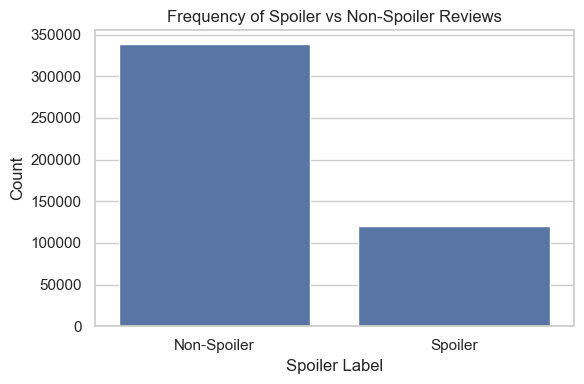

In [5]:
plt.figure(figsize = (6, 4))
sns.countplot(data = data, x = 'spoiler_label')
plt.title("Frequency of Spoiler vs Non-Spoiler Reviews")
plt.xlabel("Spoiler Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Frequently Used Words Word Cloud

In [6]:
def create_wc(text, title):
    word_cloud = WordCloud(width = 5000, height = 4000, background_color = 'white', colormap = 'tab10', max_words = 100).generate(text)
    plt.figure(figsize = (20,14))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

**All Reviews**

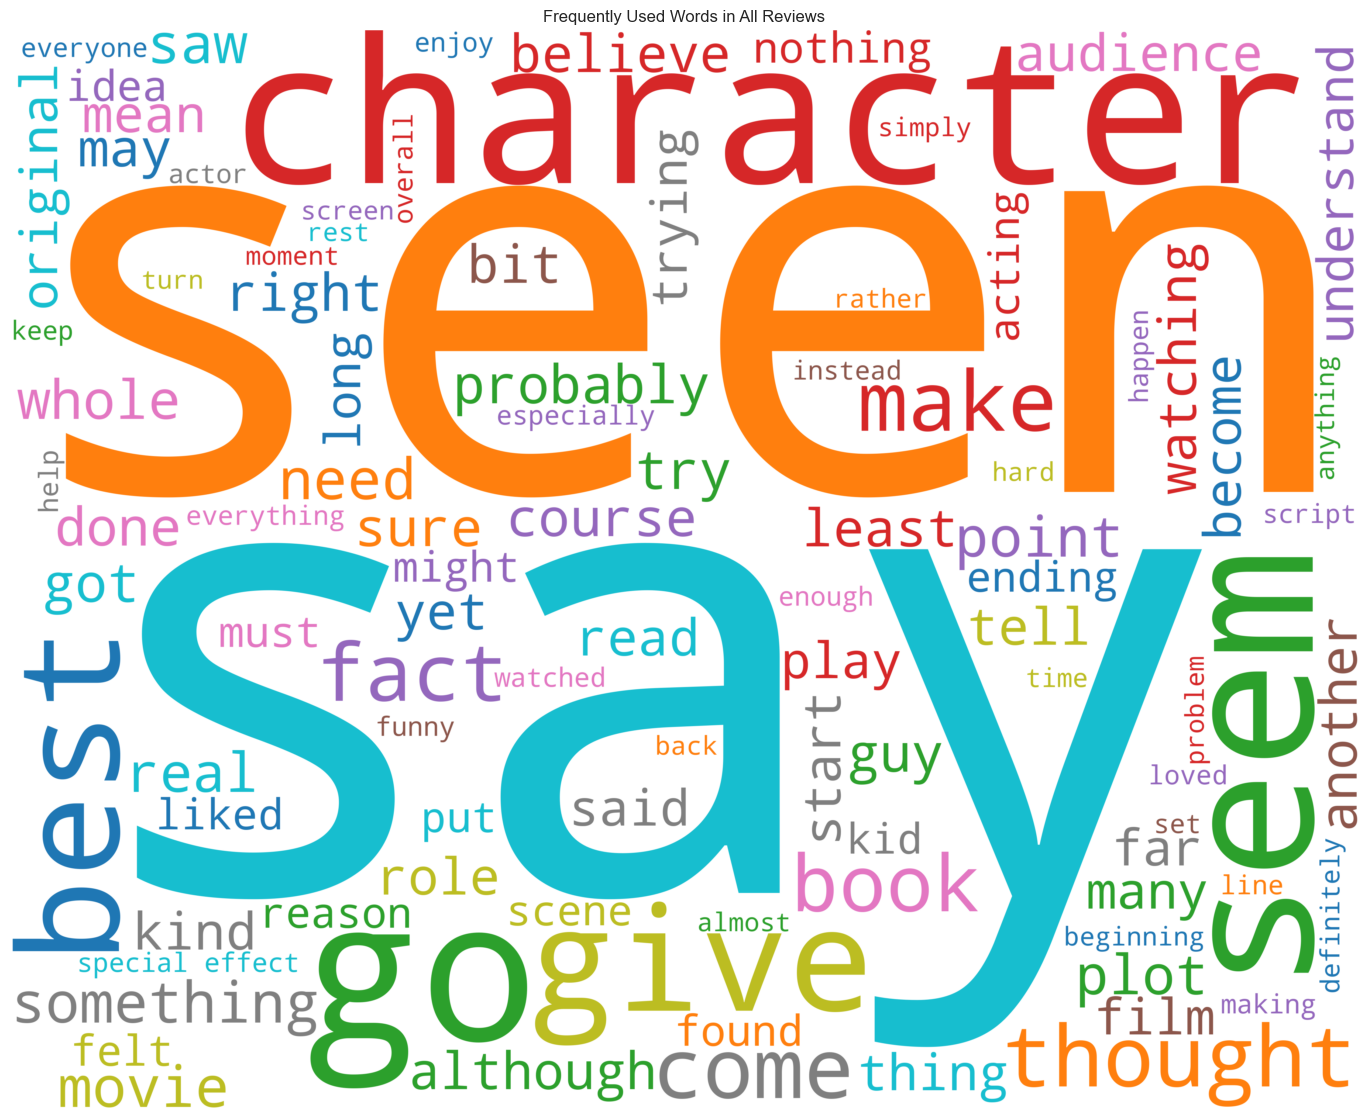

In [7]:
all_reviews = ' '.join(data['review_text'].astype(str))
create_wc(all_reviews, 'Frequently Used Words in All Reviews')

**Spoiler Reviews**

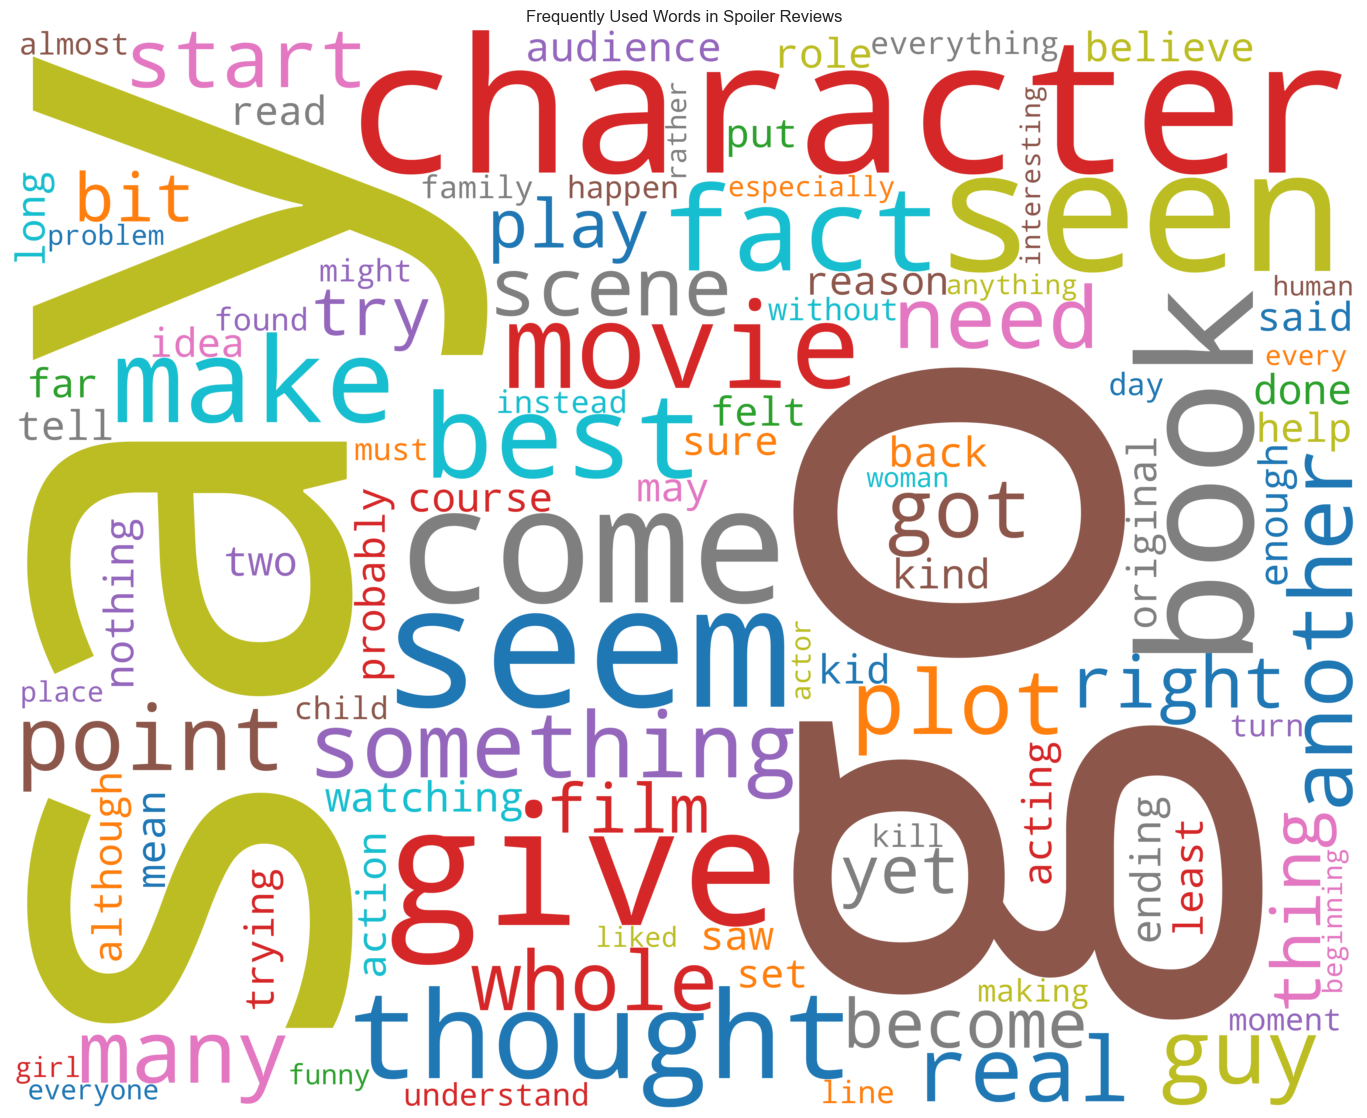

In [8]:
spoiler_data = data[data['is_spoiler'] == True]
spoiler_reviews = ' '.join(spoiler_data['review_text'].astype(str))
create_wc(spoiler_reviews, 'Frequently Used Words in Spoiler Reviews')


**Non-Spoiler Reviews**

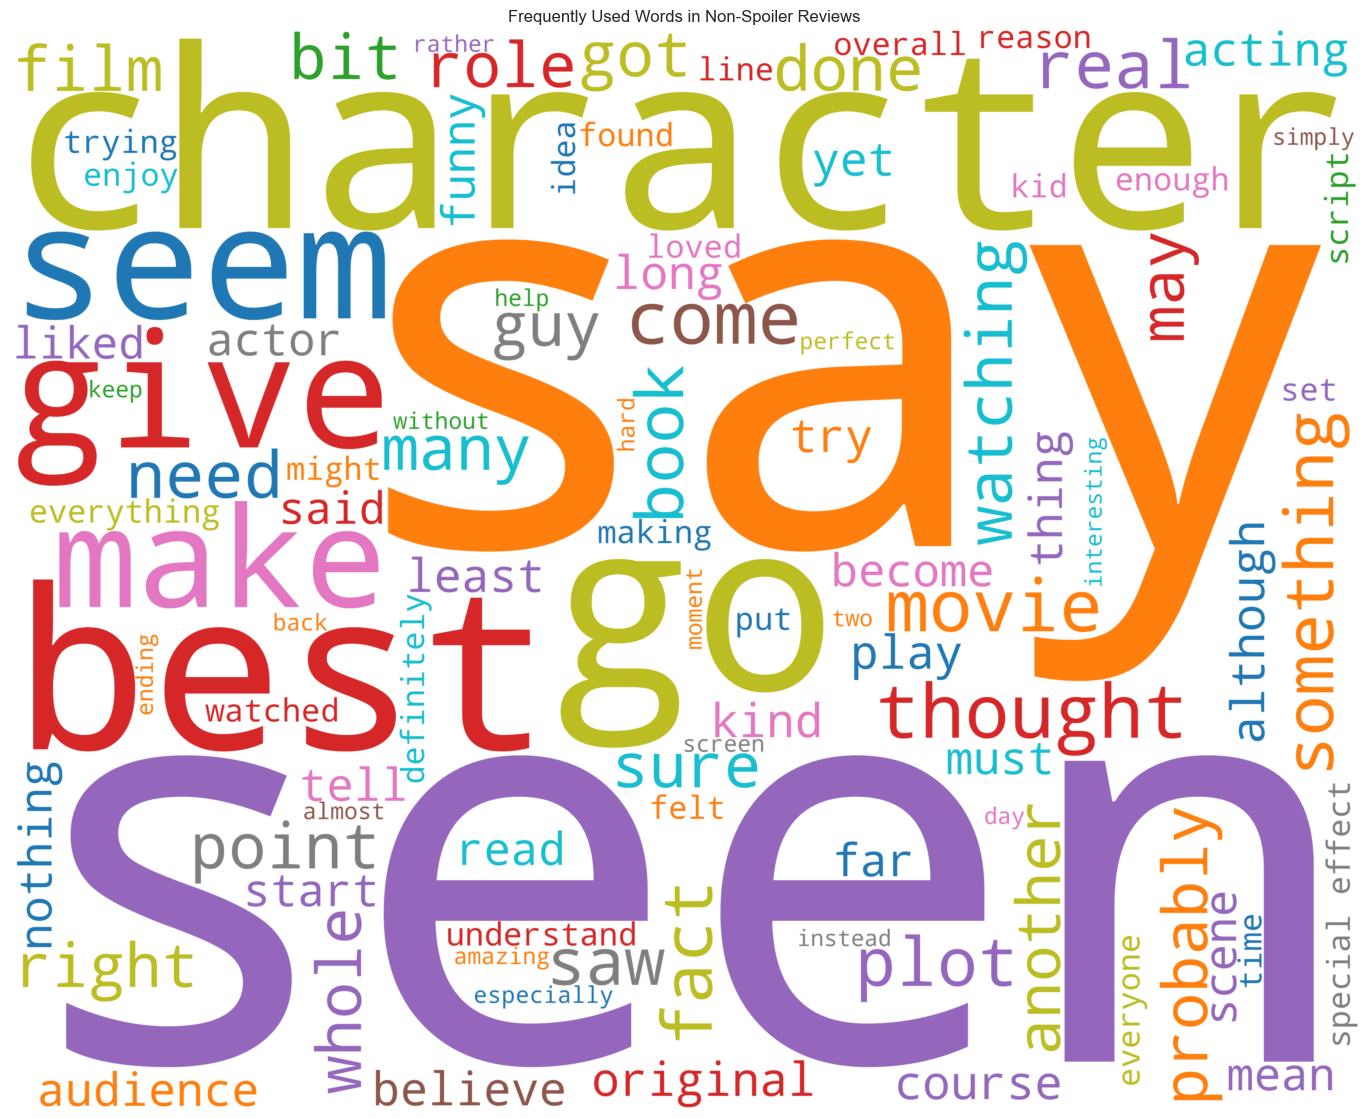

In [9]:
non_spoiler_data = data[data['is_spoiler'] == False]
non_spoiler_reviews = ' '.join(non_spoiler_data['review_text'].astype(str))
create_wc(non_spoiler_reviews, 'Frequently Used Words in Non-Spoiler Reviews')

### Review Word Counts Density Histogram

In [10]:
data['word_count'] = data['review_text'].astype(str).apply(lambda x: len(x.split()))

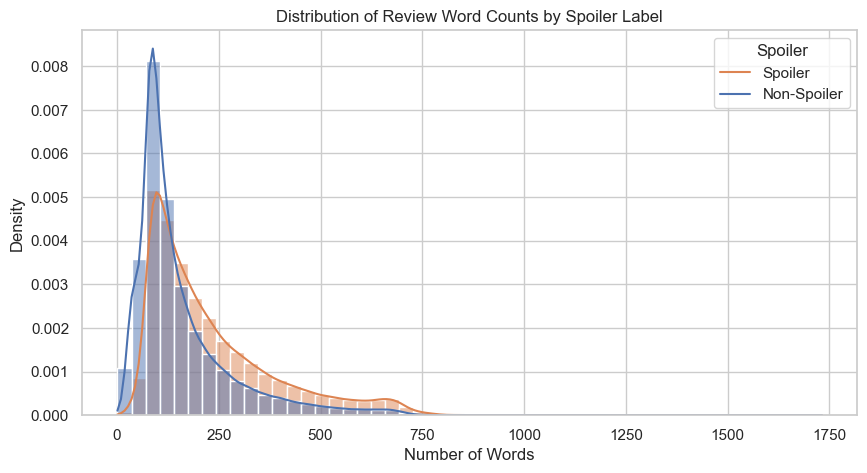

In [11]:
plt.figure(figsize = (10,5))
sns.histplot(
    data = data,
    x = 'word_count',
    bins = 50,
    kde = True,
    hue = 'is_spoiler',
    stat = 'density',   
    common_norm = False
)
plt.title('Distribution of Review Word Counts by Spoiler Label')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend(title = 'Spoiler', labels = ['Spoiler', 'Non-Spoiler'])
plt.show()


### Review Character Counts Density Histogram

In [12]:
data['char_count'] = data['review_text'].astype(str).apply(lambda x: len(x))

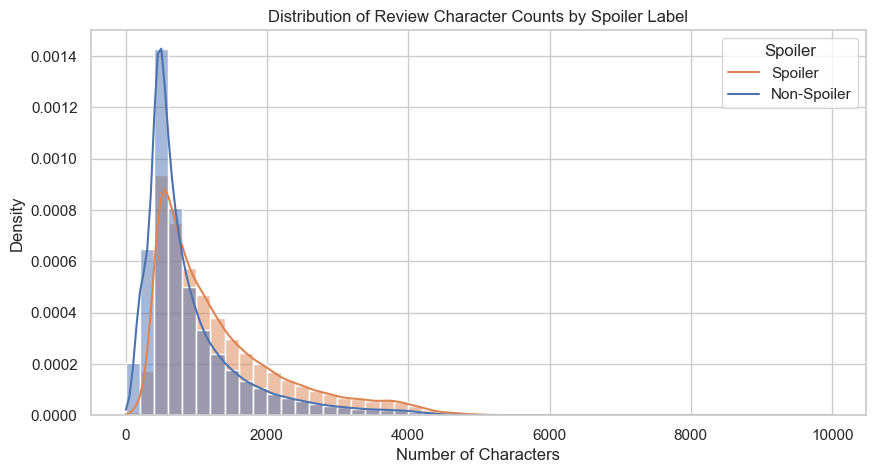

In [13]:
plt.figure(figsize = (10,5))
sns.histplot(
    data = data,
    x = 'char_count',
    bins = 50,
    kde = True,
    hue = 'is_spoiler',
    stat = 'density',   
    common_norm = False
)
plt.title('Distribution of Review Character Counts by Spoiler Label')
plt.xlabel('Number of Characters')
plt.ylabel('Density')
plt.legend(title = 'Spoiler', labels = ['Spoiler', 'Non-Spoiler'])
plt.show()


### Movie Rating Proportion Grouped Bar Chart

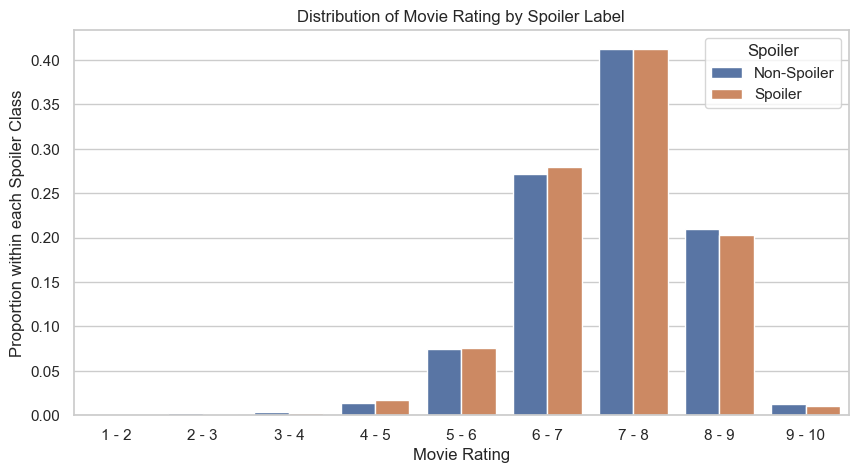

In [14]:
data['movie_rating'] = pd.to_numeric(data['movie_rating'], errors = 'coerce')
data['movie_rating_bin'] = pd.cut(data['movie_rating'], bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                            labels = ['1 - 2', '2 - 3', '3 - 4', '4 - 5', '5 - 6', '6 - 7', '7 - 8', '8 - 9', '9 - 10'])
proportion = (data.groupby('spoiler_label')['movie_rating_bin']
                 .value_counts(normalize = True)
                 .rename('proportion')
                 .reset_index())

plt.figure(figsize = (10,5))
sns.barplot(data = proportion, x = 'movie_rating_bin', y = 'proportion', hue = 'spoiler_label')

plt.title('Distribution of Movie Rating by Spoiler Label')
plt.xlabel('Movie Rating')
plt.ylabel('Proportion within each Spoiler Class')
plt.legend(title = 'Spoiler')
plt.show()

### User Rating Proportion Grouped Bar Chart

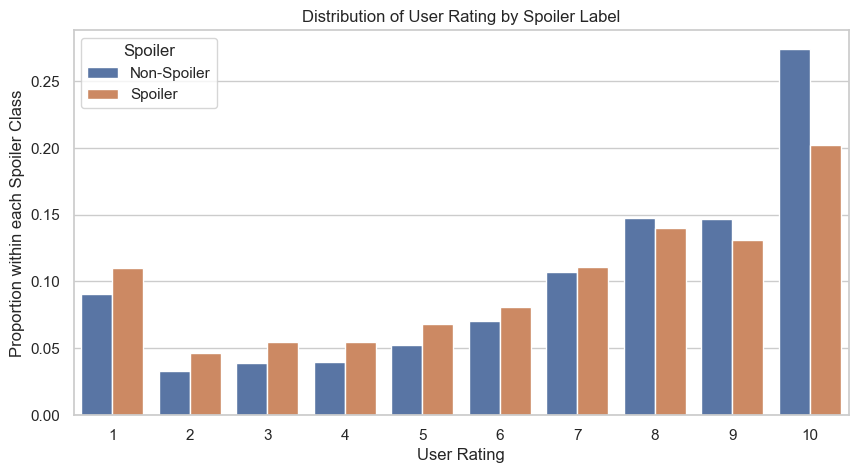

In [15]:
data['user_rating'] = pd.to_numeric(data['user_rating'], errors = 'coerce')
proportion = (data.groupby('spoiler_label')['user_rating']
                 .value_counts(normalize = True)
                 .rename('proportion')
                 .reset_index())

plt.figure(figsize = (10,5))
sns.barplot(data = proportion, x = 'user_rating', y = 'proportion', hue = 'spoiler_label', order = sorted(proportion['user_rating'].dropna().unique()))

plt.title('Distribution of User Rating by Spoiler Label')
plt.xlabel('User Rating')
plt.ylabel('Proportion within each Spoiler Class')
plt.legend(title = 'Spoiler')
plt.show()

### Genre Proportion Grouped Bar Chart

In [16]:
# Multi-label Encoding Genre
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(
    mlb.fit_transform(data['genre']),
    columns = [f"genre_{g}" for g in mlb.classes_],
    index = data.index
)
data = pd.concat([data, genre_encoded], axis=1)

In [17]:
genre_columns = [column for column in data.columns if column.startswith("genre_")]
genre_columns = list(dict.fromkeys(genre_columns))
genre_sorted = data[genre_columns].sum().sort_values(ascending = False).index.tolist()

In [19]:
proportion = data.groupby("spoiler_label")[genre_sorted].mean().T
                
proportion.index = (
    pd.Index(proportion.index)
      .str.replace(r"^genre_", "", regex=True)
      .str.title()
)

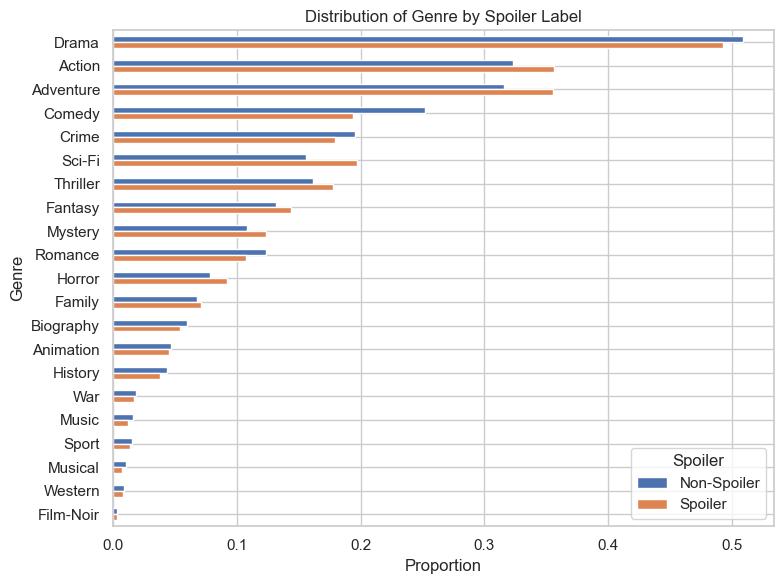

In [20]:
order = proportion.mean(axis = 1).sort_values(ascending = False).index
ax = proportion.loc[order].plot(kind = "barh", figsize = (8,6))
ax.invert_yaxis()  # Put largest at the top
ax.set_title("Distribution of Genre by Spoiler Label")
ax.set_xlabel("Proportion")
ax.set_ylabel("Genre")
ax.legend(title = "Spoiler")
plt.tight_layout()
plt.show()


### Polarity Histogram

In [21]:
data["polarity"] = data["review_text"].apply(lambda s: TextBlob(s).sentiment.polarity)

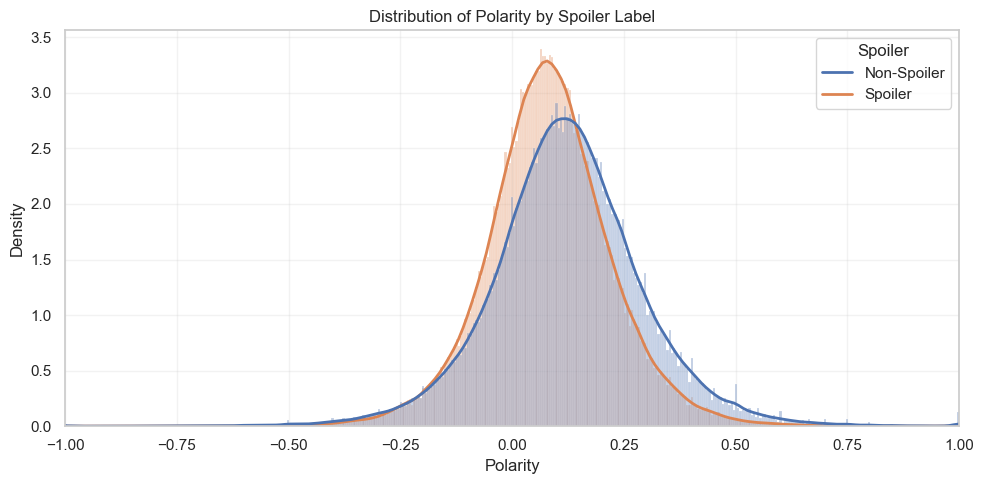

In [22]:
x0 = data.loc[data["is_spoiler"] == False, "polarity"].dropna()
x1 = data.loc[data["is_spoiler"] == True, "polarity"].dropna()
allx = pd.concat([x0, x1], ignore_index = True)

low, high = -1.0, 1.0
x0 = x0.clip(low, high)
x1 = x1.clip(low, high)
both = pd.concat([x0, x1], ignore_index = True)
bins = np.histogram_bin_edges(both, bins = "auto")

plot = pd.DataFrame({
    "polarity": np.concatenate([x0.values, x1.values]),
    "Spoiler": (["Non-Spoiler"] * len(x0)) + (["Spoiler"] * len(x1))
    })

plt.figure(figsize = (10,5))
sns.histplot(
        data = plot, x = "polarity", hue = "Spoiler",
        bins = bins, stat = "density", multiple = "layer",
        common_bins = True, common_norm = False,
        alpha = 0.35, edgecolor = None
    )


sns.kdeplot(
        data = plot, x = "polarity", hue = "Spoiler",
        common_norm = False, fill = False, lw = 2
    )

plt.xlim(low, high)
plt.title('Distribution of Polarity by Spoiler Label')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.grid(True, alpha = 0.25)
plt.tight_layout()
plt.show()

### Subjectivity Histogram

In [23]:
data["subjectivity"] = data["review_text"].apply(lambda s: TextBlob(s).sentiment.subjectivity)

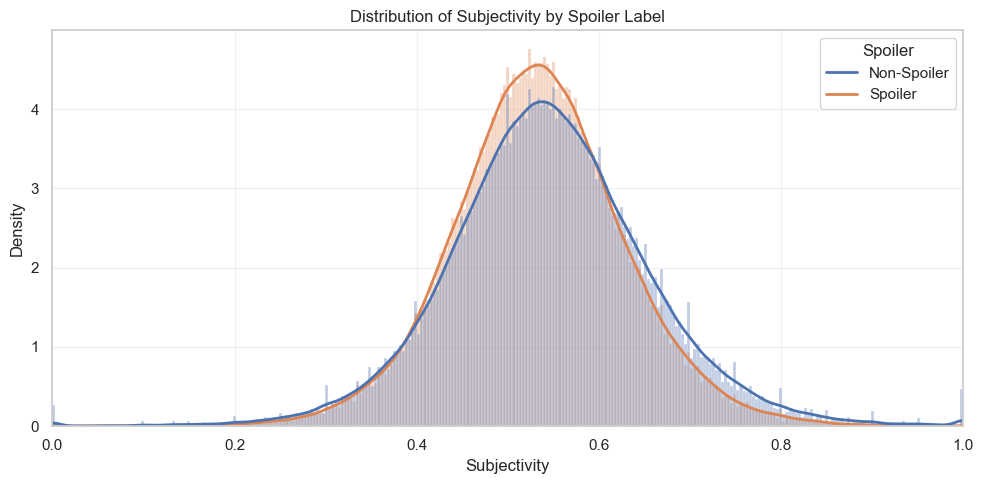

In [24]:
x0 = data.loc[data["is_spoiler"] == False, "subjectivity"].dropna()
x1 = data.loc[data["is_spoiler"] == True, "subjectivity"].dropna()
allx = pd.concat([x0, x1], ignore_index = True)

low, high = 0.0, 1.0
x0 = x0.clip(low, high)
x1 = x1.clip(low, high)
both = pd.concat([x0, x1], ignore_index = True)
bins = np.histogram_bin_edges(both, bins = "auto")

plot = pd.DataFrame({
    "subjectivity": np.concatenate([x0.values, x1.values]),
    "Spoiler": (["Non-Spoiler"] * len(x0)) + (["Spoiler"] * len(x1))
    })

plt.figure(figsize = (10,5))
sns.histplot(
        data = plot, x = "subjectivity", hue = "Spoiler",
        bins = bins, stat = "density", multiple = "layer",
        common_bins = True, common_norm = False,
        alpha = 0.35, edgecolor = None
    )


sns.kdeplot(
        data = plot, x = "subjectivity", hue = "Spoiler",
        common_norm = False, fill = False, lw = 2
    )

plt.xlim(low, high)
plt.title('Distribution of Subjectivity by Spoiler Label')
plt.xlabel('Subjectivity')
plt.ylabel('Density')
plt.grid(True, alpha = 0.25)
plt.tight_layout()
plt.show()

### Spoiler Rate Over Time (Yearly) Line Graph

In [28]:
yearly_spoiler_rate = (data.groupby('review_year')['is_spoiler'].mean().reset_index().rename(columns = {'is_spoiler': 'spoiler_rate'}))

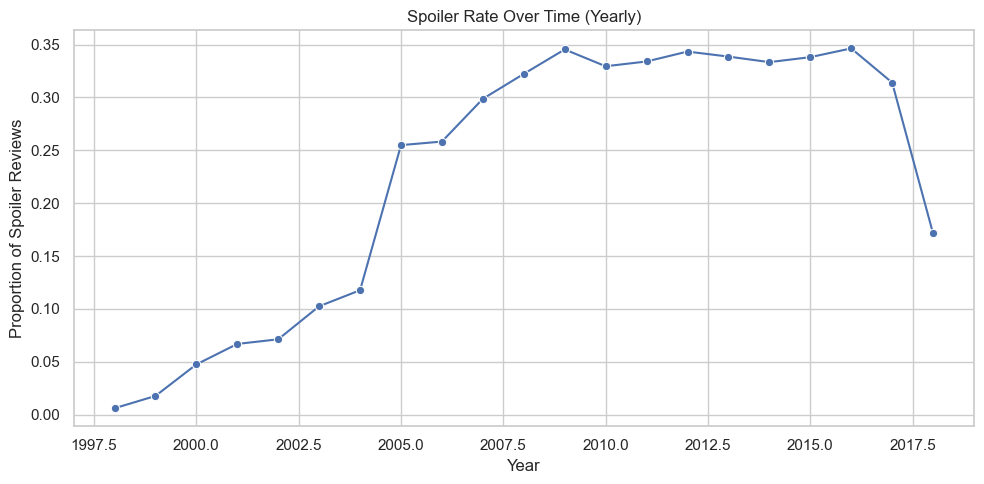

In [29]:
plt.figure(figsize = (10,5))
sns.lineplot(data = yearly_spoiler_rate, x = 'review_year', y = 'spoiler_rate', marker = 'o')
plt.title('Spoiler Rate Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Proportion of Spoiler Reviews')
plt.tight_layout()
plt.show()
